In [1]:
import pandas as pd
treino = pd.read_csv('train_3_2.csv')
teste = pd.read_csv('test_3_2.csv')

In [2]:
treino.shape

(1460, 146)

In [3]:
treino.dtypes.value_counts()

int64      133
float64     13
dtype: int64

In [4]:
cols_nr = treino.columns[treino.dtypes != 'object']
cols_nr[cols_nr != 'SalePrice']

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'Fence_MnPrv', 'Fence_infrequent_sklearn',
       'MiscFeature_infrequent_sklearn', 'SaleType_New', 'SaleType_WD',
       'SaleType_infrequent_sklearn', 'SaleCondition_Abnorml',
       'SaleCondition_Normal', 'SaleCondition_Partial',
       'SaleCondition_infrequent_sklearn'],
      dtype='object', length=145)

In [5]:
treino = treino.loc[:,cols_nr]
treino.shape

(1460, 146)

In [6]:
teste.shape

(1459, 145)

In [7]:
teste = teste.loc[:,cols_nr[cols_nr != 'SalePrice']]
teste.shape

(1459, 145)

In [8]:
X = treino.drop('SalePrice',axis=1)
y = treino.SalePrice

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg_rl = LinearRegression().fit(X_train, y_train)

In [13]:
y_pred_rl = reg_rl.predict(X_test)

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
reg_rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)

In [16]:
y_pred_rf = reg_rf.predict(X_test)

In [17]:
! pip install xgboost


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from xgboost import XGBRegressor

In [19]:
reg_xgb = XGBRegressor(random_state=42).fit(X_train, y_train) 

In [20]:
y_pred_xgb = reg_xgb.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [22]:
print(mean_absolute_error(y_test, y_pred_rl))
print(mean_squared_error(y_test, y_pred_rl))

22157.115236191457
1539851963.9376073


In [23]:
print(mean_absolute_error(y_test, y_pred_rf))
print(mean_squared_error(y_test, y_pred_rf))

17821.686556016597
1006122691.6915648


In [24]:
print(mean_absolute_error(y_test, y_pred_xgb))
print(mean_squared_error(y_test, y_pred_xgb))

17415.3171842583
1118488708.6055784


In [25]:
import matplotlib.pyplot as plt

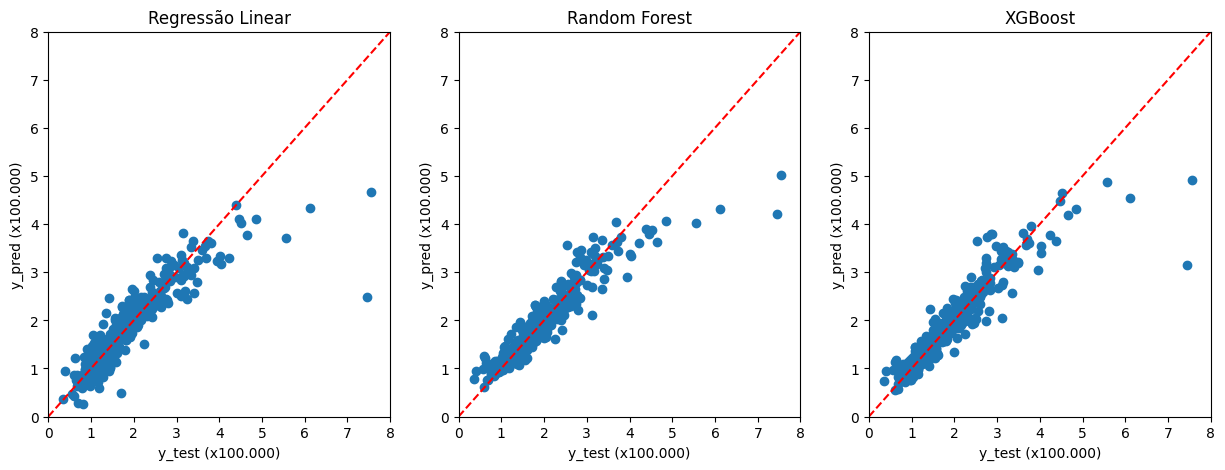

In [26]:
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rl/100000)
ax[0].plot([0,8],[0,8],'--r')
ax[1].scatter(y_test/100000, y_pred_rf/100000)
ax[1].plot([0,8],[0,8],'--r')
ax[2].scatter(y_test/100000, y_pred_xgb/100000)
ax[2].plot([0,8],[0,8],'--r')

ax[0].set(xlim=(0, 8),ylim=(0, 8))
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Regressão Linear')
ax[1].set(xlim=(0, 8),ylim=(0, 8))
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('Random Forest')
ax[2].set(xlim=(0, 8),ylim=(0, 8))
ax[2].set_xlabel('y_test (x100.000)')
ax[2].set_ylabel('y_pred (x100.000)')
ax[2].set_title('XGBoost')

plt.show()

In [27]:
y_pred = reg_rf.predict(teste)

In [28]:
teste['SalePrice'] = y_pred

In [29]:
base_kaggle = teste[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,122889.75
1,1462,148248.50
2,1463,190463.51


In [30]:
base_kaggle.to_csv('resultado4_2.csv',index=False)